## Replication for "Asymmetry by Design", November 4, 2020
### By Adam Goldstein and Charlie Eaton

### Figure A3: Disentangling the Effects of Multi-Brand Transition Among Acquired and Legacy Campuses

In [1]:
ssc install reghdfe
ssc install ftools
net install grc1leg
ssc install carryforward

In [2]:
copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_unitidasymmetry.dta" ///
    data/d_unitidasymmetry.dta, replace

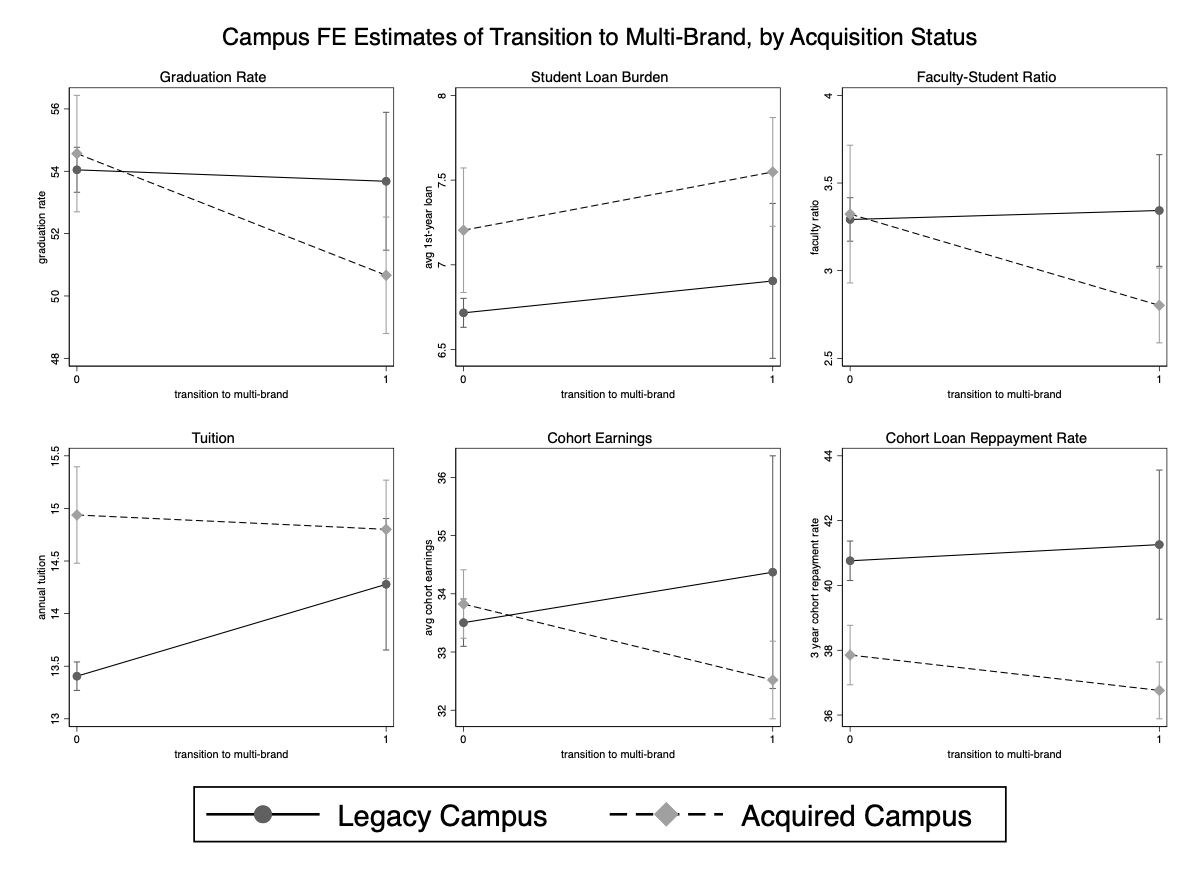

In [3]:
quietly {
quietly use data/d_unitidasymmetry, clear
quietly set scheme s1mono
quietly set more off
quietly est clear

sort unitid year

by unitid: gen change_systemid= 1 if systemid!=l.systemid & l.systemid!=.
by unitid: carryforward change_systemid, replace
recode change_systemid .=0
 
label define change_systemid 0 "Legacy Campus" 1 "Acquired Campus"
label val change_systemid change_systemid
    
reghdfe grad_rate_150_p_w i.multi_brand##i.change_systemid system_under all_under ///
 pell_grants_per_fte_c_w  white_share_w black_share_w hisp_share_w ///
    online selective i.iclevel dpcttype* , absorb(unitid year) cluster(unitid year)
margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Graduation Rate") name(ancillary1a, replace) ytitle("graduation rate") xtitle("transition to multi-brand")
 
reghdfe loan_amount_borrower_c_w i.multi_brand##i.change_systemid system_under all_under ///
    pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w ///
    i.iclevel dpcttype* , absorb(unitid year) cluster(unitid year)
margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Student Loan Burden") name(ancillary1b, replace) ytitle("avg 1st-year loan") xtitle("transition to multi-brand")
 
reghdfe tuitionall_c_w i.multi_brand##i.change_systemid system_under all_under ///
    pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w ///
    i.iclevel dpcttype* , absorb(unitid year) cluster(unitid year)
margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Tuition") name(ancillary1d, replace) ytitle("annual tuition") xtitle("transition to multi-brand")

reghdfe f2.ft_faculty_per_100fte i.multi_brand##i.change_systemid system_under all_under ///
    pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w ///
    i.iclevel dpcttype* , absorb(unitid year) cluster(unitid year)
    margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Faculty-Student Ratio") name(ancillary1c, replace) ytitle("faculty ratio") xtitle("transition to multi-brand")
 
quietly use data/d_opeidasymmetry, clear
    keep if rankopeid==1
sort opeid year

by opeid: gen change_systemid= 1 if systemid!=l.systemid & l.systemid!=.
by opeid: carryforward change_systemid, replace
recode change_systemid .=0
 
label define change_systemid 0 "Legacy Campus" 1 "Acquired Campus"
label val change_systemid change_systemid

reghdfe f2.mn_earn_wne_p6_c_w i.multi_brand##i.change_systemid system_under ///
    selective online i.iclevel dpcttype* white_share_w black_share_w hisp_share_w ///
    f2.earn_pct_lo dpcttype*, absorb(opeid year) cluster(opeid year)
margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Cohort Earnings") name(ancillary1e, replace) ytitle("avg cohort earnings") xtitle("transition to multi-brand")
 
reghdfe f2.rpy_3yr_rt_supp i.multi_brand##i.change_systemid system_under ///
    selective online i.iclevel dpcttype* white_share_w black_share_w hisp_share_w ///
    f2.rpy_3yr_pct_lo dpcttype*, absorb(opeid year) cluster(opeid year)
margins i.multi_brand#i.change_systemid
quietly marginsplot, xdim(multi_brand) title("Cohort Loan Reppayment Rate") name(ancillary1f, replace) ytitle("3 year cohort repayment rate") xtitle("transition to multi-brand")

grc1leg ancillary1a ancillary1b ancillary1c ancillary1d ancillary1e ancillary1f, rows(2) altshrink title("Campus FE Estimates of Transition to Multi-Brand, by Acquisition Status", size(small)) 
graph display
graph export figures/fa3_asymmetryacquiredvlegacy.pdf, replace
}